In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")



In [12]:
url="https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt"
df = pd.read_csv(url)

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [14]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

<AxesSubplot:xlabel='satisfaction_level'>

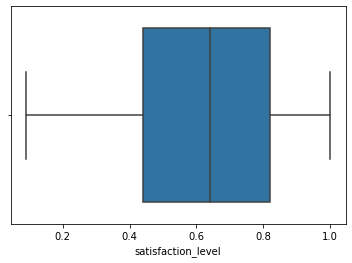

In [6]:
sns.boxplot(df["satisfaction_level"])

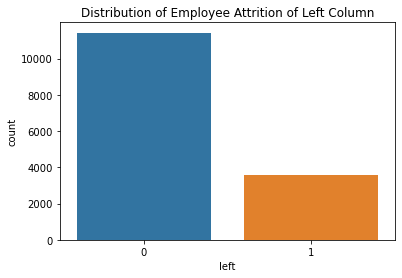

In [7]:
sns.countplot(x='left', data=df)
plt.title('Distribution of Employee Attrition of Left Column')
plt.show()

<AxesSubplot:>

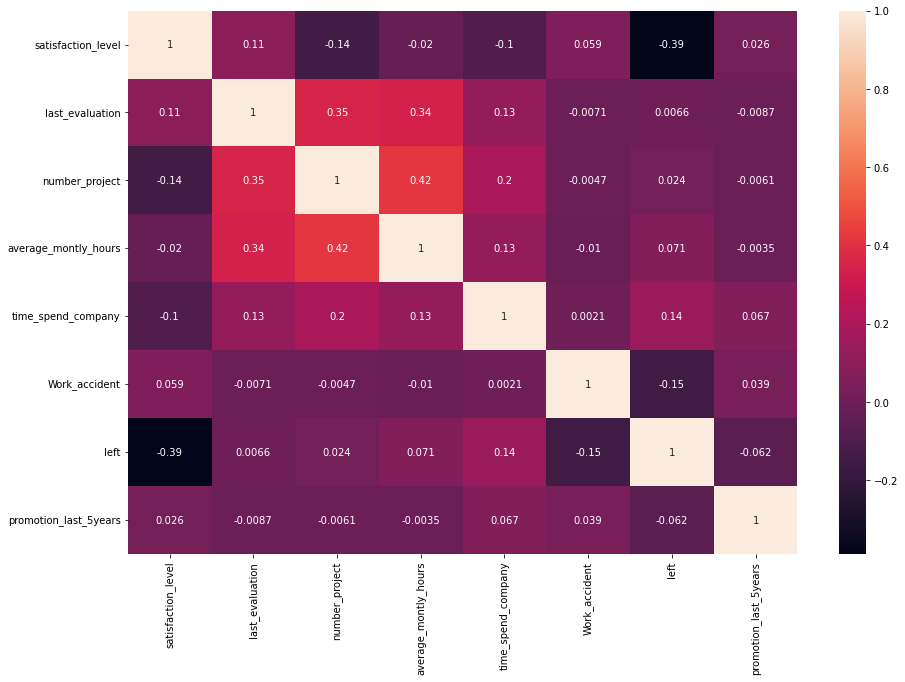

In [30]:
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

In [8]:
X = df.drop('left', axis=1)
y = df['left']


In [15]:
X_encoded = pd.get_dummies(X, columns=['sales','salary'], drop_first=True)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

In [21]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)



In [22]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

In [23]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_predictions = gb_model.predict(X_test_scaled)

In [24]:
def evaluate_model(predictions, model_name):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} Metrics:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("------------------------")

In [25]:
evaluate_model(lr_predictions, "Linear Regression")
evaluate_model(dt_predictions, "Decision Tree Regression")
evaluate_model(rf_predictions, "Random Forest Regression")
evaluate_model(gb_predictions, "Gradient Boosting Regression")

Linear Regression Metrics:
Mean Squared Error: 0.144375803092833
R-squared: 0.1976962763833372
------------------------
Decision Tree Regression Metrics:
Mean Squared Error: 0.023666666666666666
R-squared: 0.8684831226181862
------------------------
Random Forest Regression Metrics:
Mean Squared Error: 0.013877833333333332
R-squared: 0.9228801702186514
------------------------
Gradient Boosting Regression Metrics:
Mean Squared Error: 0.024395537769033995
R-squared: 0.8644327486154879
------------------------


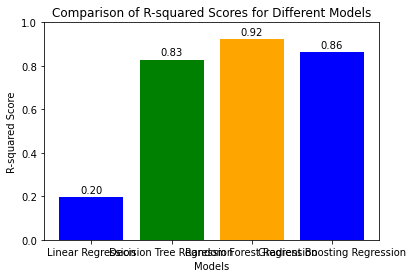

In [28]:
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression','Gradient Boosting Regression']
r2_scores = [0.197, 0.828, 0.922,0.864]

plt.bar(models, r2_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores for Different Models')
plt.ylim(0, 1) 


for i, score in enumerate(r2_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom')


plt.show()

In [29]:
# The best model among them is Random Forest Regression